In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df=pd.read_csv("clean_data_after_eda.csv")


In [37]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [38]:
df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
var_year_price_off_peak_var       0
var_year_price_peak_var           0
var_year_price_mid_peak_var 

In [39]:
df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [40]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [41]:
price_df = pd.read_csv('/content/price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [42]:
price_df.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

In [43]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885
...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,40.728885
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,40.728885
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,40.728885
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,40.728885


In [44]:
jan_prices=monthly_price_by_id.groupby('id').first().reset_index()
dec_prices=monthly_price_by_id.groupby('id').last().reset_index()


In [45]:
jan_prices=jan_prices.rename(columns={'price_off_peak_var': 'price_off_peak_var_jan', 'price_off_peak_fix': 'price_off_peak_fix_jan'})
jan_prices

,id,price_date,price_off_peak_var_jan,price_off_peak_fix_jan
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-01-01,0.162720,41.063970
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-01-01,0.148825,44.266931
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-01-01,0.153159,41.063970
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-01-01,0.127566,40.565969


In [46]:
dec_prices=dec_prices.rename(columns={'price_off_peak_var': 'price_off_peak_var_dec', 'price_off_peak_fix': 'price_off_peak_fix_dec'})
dec_prices

,id,price_date,price_off_peak_var_dec,price_off_peak_fix_dec
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-12-01,0.112488,40.728885
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-12-01,0.145047,44.444710
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-12-01,0.151399,41.228885
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-12-01,0.118175,40.728885


In [47]:
diff = pd.merge(dec_prices,jan_prices.drop(columns='price_date'), on='id')
diff

,id,price_date,price_off_peak_var_dec,price_off_peak_fix_dec,price_off_peak_var_jan,price_off_peak_fix_jan
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.149434,44.266931
...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-12-01,0.112488,40.728885,0.162720,41.063970
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-12-01,0.145047,44.444710,0.148825,44.266931
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-12-01,0.151399,41.228885,0.153159,41.063970
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-12-01,0.118175,40.728885,0.127566,40.565969


In [48]:
diff["price_offpeak_var_dec_jan"]=diff["price_off_peak_var_dec"]-diff["price_off_peak_var_jan"]
diff["price_offpeak_fix_dec_jan"]=diff["price_off_peak_fix_dec"]-diff["price_off_peak_fix_jan"]
diff = diff[['id', 'price_offpeak_var_dec_jan','price_offpeak_fix_dec_jan']]
diff.head()

,id,price_offpeak_var_dec_jan,price_offpeak_fix_dec_jan
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [49]:
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,price_offpeak_var_dec_jan,price_offpeak_fix_dec_jan
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


In [50]:
df['price_diff_off_peak_peak_var'] = df['forecast_price_energy_off_peak'] - df['forecast_price_energy_peak']
df['price_diff_off_peak_peak_fix'] = df['forecast_price_pow_off_peak'] - df['forecast_price_energy_peak']
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,price_offpeak_var_dec_jan,price_offpeak_fix_dec_jan,price_diff_off_peak_peak_var,price_diff_off_peak_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961,0.016339,40.508559
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.145711,44.311378
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779,0.077895,44.223479
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779,0.146694,44.311378
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916,0.016885,40.506686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.008653,0.177779,0.138305,44.311378
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,1,-0.007395,0.236694,0.008275,58.904060
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,1,-0.006192,0.162916,0.016885,40.506686
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.145711,44.311378


Identifying Price Disparities: By calculating the difference between off-peak and peak prices, we can identify how much more expensive or cheaper the energy is during peak hours compared to off-peak hours. This disparity can be an important factor for understanding customer behavior and energy consumption patterns.

In [51]:
df['avg_price_off_peak'] = df[['var_6m_price_off_peak', 'var_year_price_off_peak']].mean(axis=1)
df['avg_price_peak'] = df[['var_6m_price_peak', 'var_year_price_peak']].mean(axis=1)
df['avg_price_mid_peak'] = df[['var_6m_price_mid_peak', 'var_year_price_mid_peak']].mean(axis=1)


Smoothing Out Variations: Prices can fluctuate over time due to various factors such as market demand, supply constraints, and regulatory changes. Calculating the average price over multiple periods helps smooth out these short-term fluctuations and provides a more stable representation of the price.

Capturing Long-term Trends: By averaging prices over 6 months and 1 year, we capture both short-term and long-term trends. This can be useful for understanding how prices are evolving over different time horizons.

In [52]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_peak,var_6m_price_mid_peak,churn,price_offpeak_var_dec_jan,price_offpeak_fix_dec_jan,price_diff_off_peak_peak_var,price_diff_off_peak_peak_fix,avg_price_off_peak,avg_price_peak,avg_price_mid_peak
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.953056e+01,4.423670e+01,1,0.020057,3.700961,0.016339,40.508559,1.594636,7.454064e+01,33.129839
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.145711,44.311378,0.007977,9.134179e-04,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,9.450150e-08,0.000000e+00,0,-0.004670,0.177779,0.077895,44.223479,0.003836,1.751763e-07,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000e+00,0,-0.004547,0.177779,0.146694,44.311378,0.003237,0.000000e+00,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,2.896760e-06,4.860000e-10,0,-0.006192,0.162916,0.016885,40.506686,0.002727,9.804341e-04,0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000e+00,0.000000e+00,0,-0.008653,0.177779,0.138305,44.311378,0.004199,0.000000e+00,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,5.684001e-03,2.987132e-04,1,-0.007395,0.236694,0.008275,58.904060,0.014271,5.426245e-03,0.000285
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,2.896760e-06,4.860000e-10,1,-0.006192,0.162916,0.016885,40.506686,0.002024,7.272859e-04,0.000323
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.145711,44.311378,0.007977,9.134179e-04,0.000000


In [53]:
df['month_activ'] = pd.to_datetime(df['date_activ']).dt.month
df['year_activ'] = pd.to_datetime(df['date_activ']).dt.year
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,price_offpeak_var_dec_jan,price_offpeak_fix_dec_jan,price_diff_off_peak_peak_var,price_diff_off_peak_peak_fix,avg_price_off_peak,avg_price_peak,avg_price_mid_peak,month_activ,year_activ
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.020057,3.700961,0.016339,40.508559,1.594636,7.454064e+01,33.129839,6,2013
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,-0.003767,0.177779,0.145711,44.311378,0.007977,9.134179e-04,0.000000,8,2009
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,-0.004670,0.177779,0.077895,44.223479,0.003836,1.751763e-07,0.000000,4,2010
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,-0.004547,0.177779,0.146694,44.311378,0.003237,0.000000e+00,0.000000,3,2010
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,-0.006192,0.162916,0.016885,40.506686,0.002727,9.804341e-04,0.000436,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0,-0.008653,0.177779,0.138305,44.311378,0.004199,0.000000e+00,0.000000,5,2012
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,1,-0.007395,0.236694,0.008275,58.904060,0.014271,5.426245e-03,0.000285,8,2012
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,1,-0.006192,0.162916,0.016885,40.506686,0.002024,7.272859e-04,0.000323,2,2012
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0,-0.003767,0.177779,0.145711,44.311378,0.007977,9.134179e-04,0.000000,8,2012


In [54]:
df['cons_price_interaction'] = df['cons_12m'] * df['avg_price_off_peak']

Economic Impact: The product of energy consumption and off-peak price gives a direct measure of the cost incurred by the customer when consuming energy during off-peak hours. This is a key metric for understanding customer expenses and behavior.

Behavioral Insights: Customers who have high energy consumption during off-peak hours might be more price-sensitive or strategic in their energy usage. By looking at the interaction term, you can identify patterns in how off-peak pricing influences overall energy costs and, consequently, customer behavior, such as churn or satisfaction.

In [55]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_offpeak_var_dec_jan,price_offpeak_fix_dec_jan,price_diff_off_peak_peak_var,price_diff_off_peak_peak_fix,avg_price_off_peak,avg_price_peak,avg_price_mid_peak,month_activ,year_activ,cons_price_interaction
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.020057,3.700961,0.016339,40.508559,1.594636,7.454064e+01,33.129839,6,2013,0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,-0.003767,0.177779,0.145711,44.311378,0.007977,9.134179e-04,0.000000,8,2009,37.174550
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,-0.004670,0.177779,0.077895,44.223479,0.003836,1.751763e-07,0.000000,4,2010,2.086566
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,-0.004547,0.177779,0.146694,44.311378,0.003237,0.000000e+00,0.000000,3,2010,5.126937
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,-0.006192,0.162916,0.016885,40.506686,0.002727,9.804341e-04,0.000436,1,2010,12.068839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,-0.008653,0.177779,0.138305,44.311378,0.004199,0.000000e+00,0.000000,5,2012,135.513307
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,-0.007395,0.236694,0.008275,58.904060,0.014271,5.426245e-03,0.000285,8,2012,103.081314
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,-0.006192,0.162916,0.016885,40.506686,0.002024,7.272859e-04,0.000323,2,2012,3.732580
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,-0.003767,0.177779,0.145711,44.311378,0.007977,9.134179e-04,0.000000,8,2012,1.045035


In [56]:
df=df.drop(columns=["id","channel_sales","origin_up","has_gas"],axis=1)

In [57]:
df

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,price_offpeak_var_dec_jan,price_offpeak_fix_dec_jan,price_diff_off_peak_peak_var,price_diff_off_peak_peak_fix,avg_price_off_peak,avg_price_peak,avg_price_mid_peak,month_activ,year_activ,cons_price_interaction
0,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,...,0.020057,3.700961,0.016339,40.508559,1.594636,7.454064e+01,33.129839,6,2013,0.000000
1,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,...,-0.003767,0.177779,0.145711,44.311378,0.007977,9.134179e-04,0.000000,8,2009,37.174550
2,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,...,-0.004670,0.177779,0.077895,44.223479,0.003836,1.751763e-07,0.000000,4,2010,2.086566
3,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,...,-0.004547,0.177779,0.146694,44.311378,0.003237,0.000000e+00,0.000000,3,2010,5.126937
4,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,...,-0.006192,0.162916,0.016885,40.506686,0.002727,9.804341e-04,0.000436,1,2010,12.068839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,...,-0.008653,0.177779,0.138305,44.311378,0.004199,0.000000e+00,0.000000,5,2012,135.513307
14602,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,...,-0.007395,0.236694,0.008275,58.904060,0.014271,5.426245e-03,0.000285,8,2012,103.081314
14603,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,...,-0.006192,0.162916,0.016885,40.506686,0.002024,7.272859e-04,0.000323,2,2012,3.732580
14604,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,...,-0.003767,0.177779,0.145711,44.311378,0.007977,9.134179e-04,0.000000,8,2012,1.045035


In [58]:
df.dtypes

cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act                                int64
net_margin                               float64
num_years_antig                            int64
pow_max             

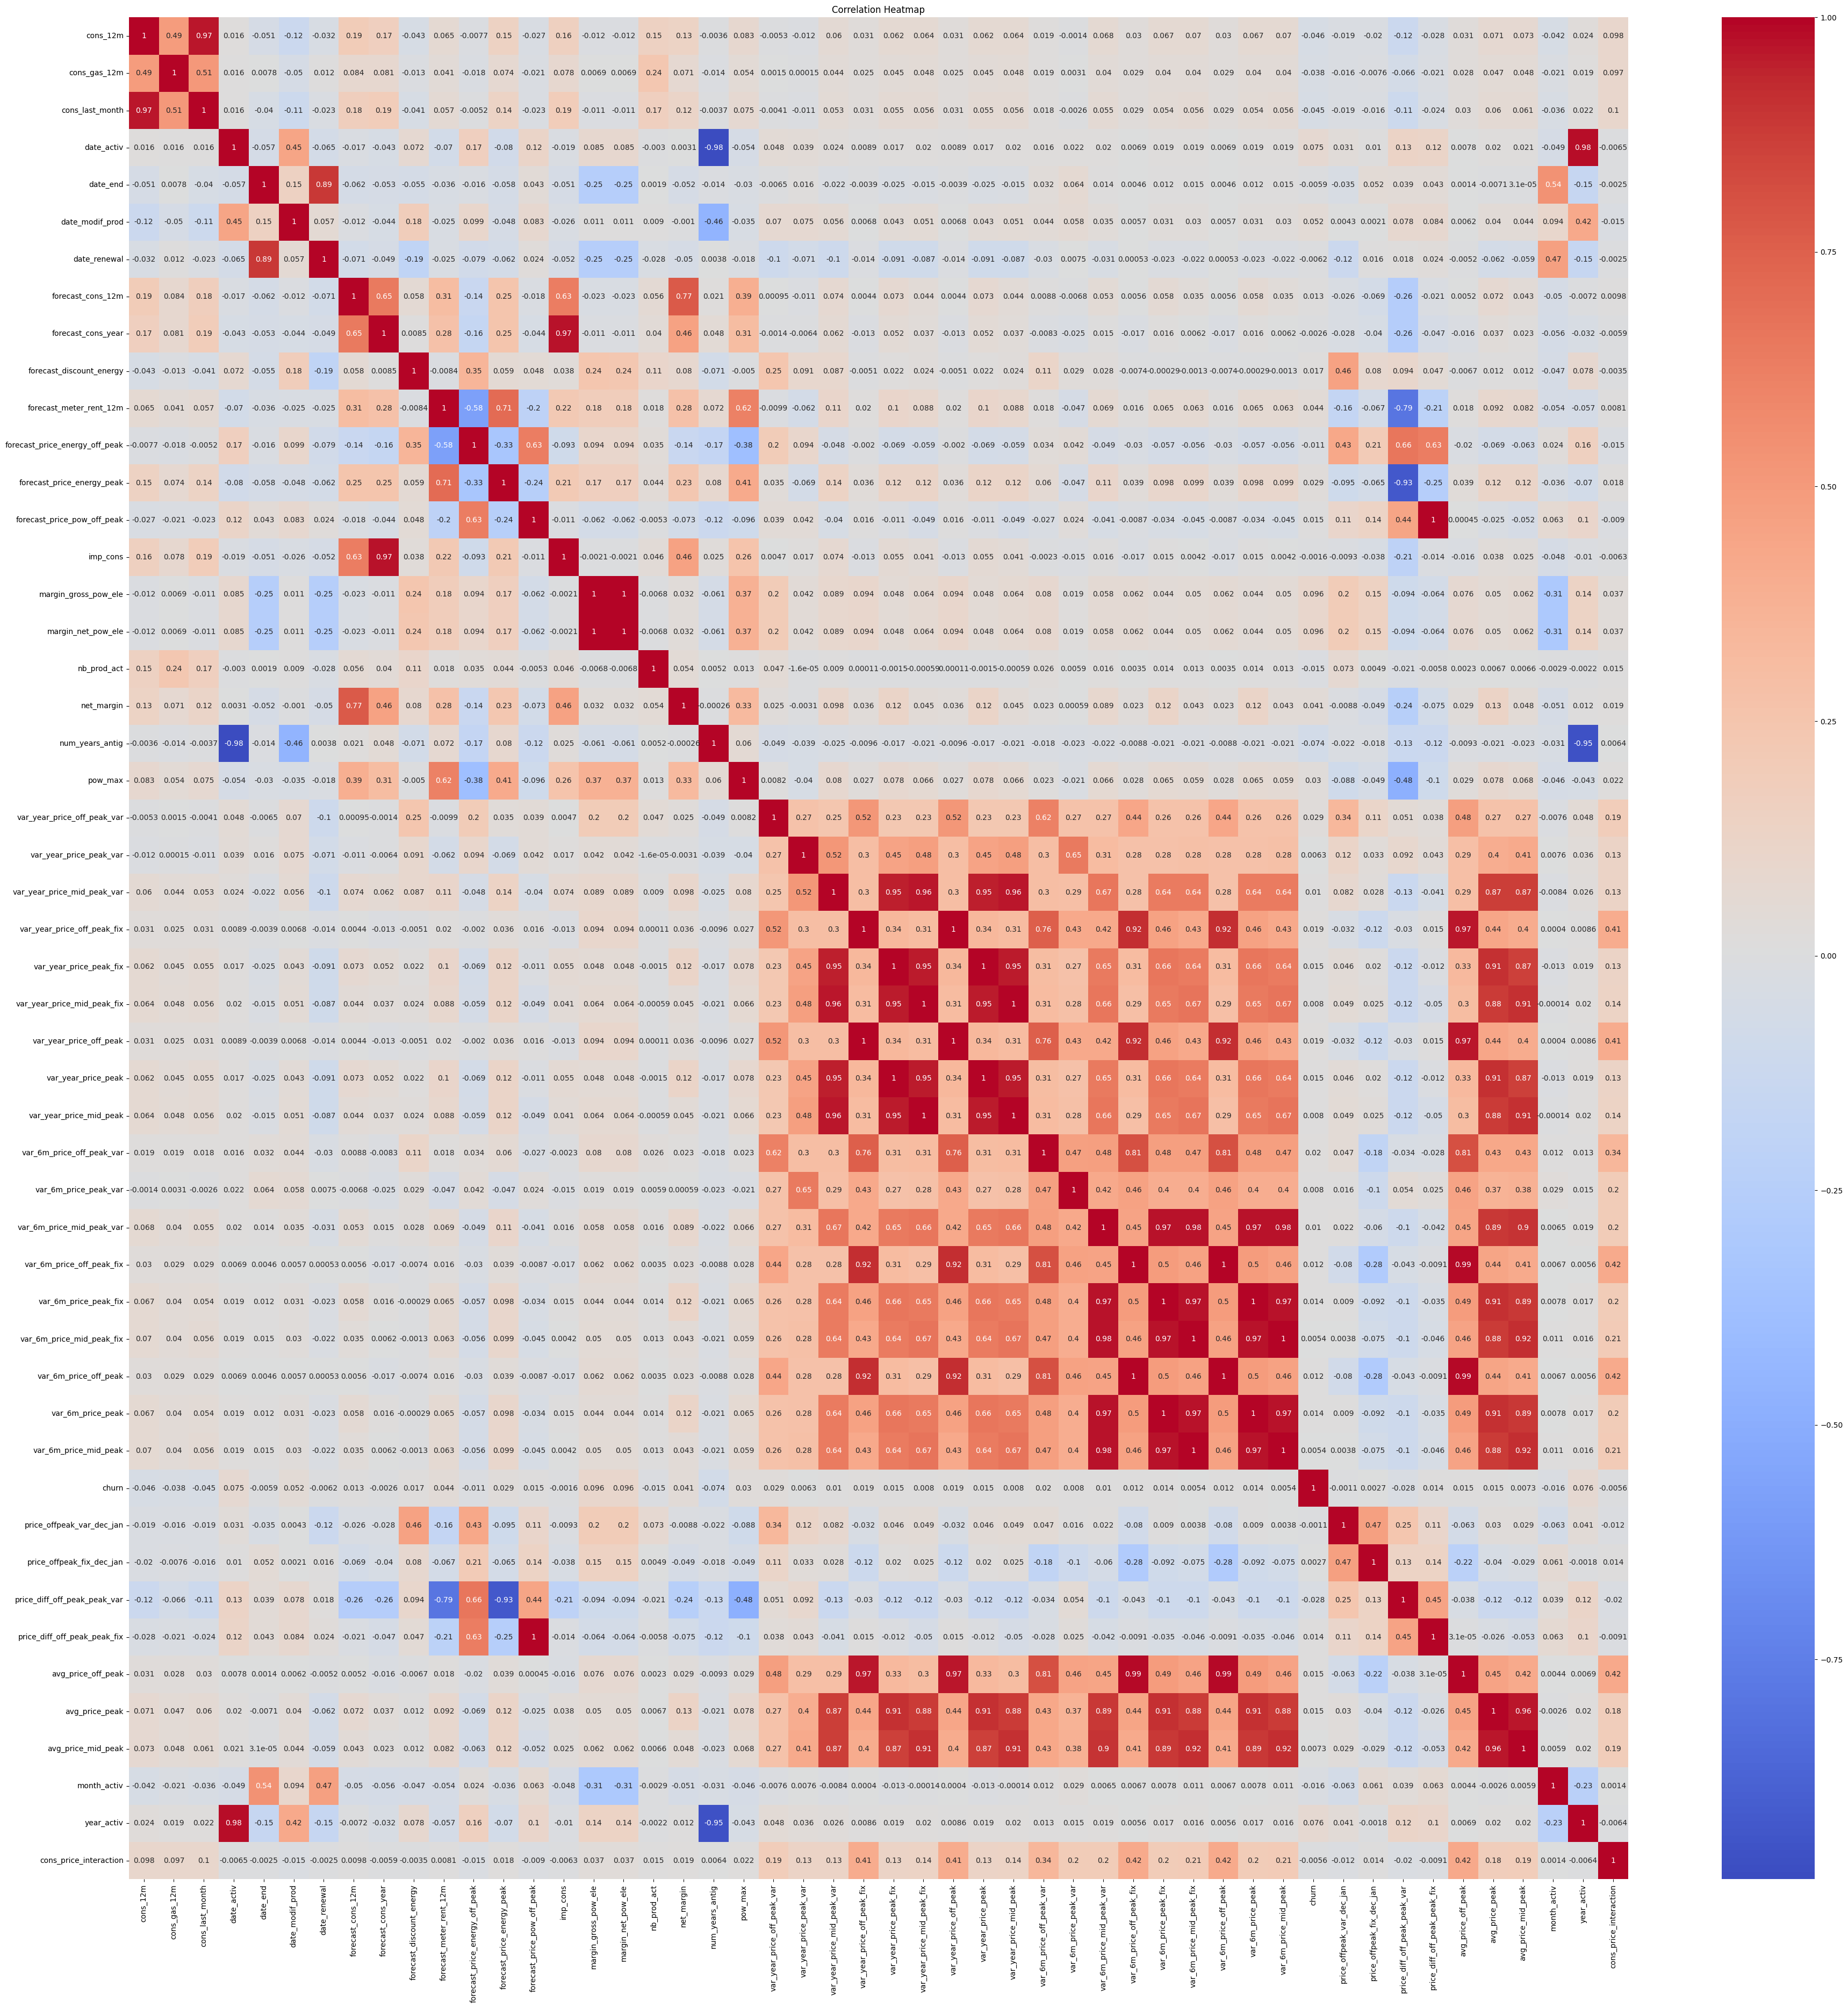

In [60]:
import seaborn as sns
plt.figure(figsize=(45,45))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [61]:
df.isnull().sum()

cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
pow_max                           0
var_year_price_off_peak_var       0
var_year_price_peak_var           0
var_year_price_mid_peak_var       0
var_year_price_off_peak_fix       0
var_year_price_peak_fix           0
var_year_price_mid_peak_fix       0
var_year_price_off_peak     